In [1]:
import numpy as np

In [2]:
daegu = np.loadtxt('daegu.csv', delimiter=',', dtype='str')

In [7]:
daegu_date = daegu[:,[0]]
daeguDate = np.empty((len(daegu_date),1))
count = 0
for i in daegu_date:
    q = i[0].split('/')
    daeguDate[count] = q[2]+q[0]+q[1]
    count+=1
    
daegu_temp = daegu[:,[1,2,3,4]]
daegu_temp = daegu_temp.astype(np.float64)
daeguTemp = np.concatenate([daeguDate, daegu_temp], axis=1)
daeguTemp


array([[ 2.0170101e+07,  1.4300000e+02,  3.4000000e+00, -2.0000000e+00,
         1.0000000e+01],
       [ 2.0170102e+07,  1.4300000e+02,  5.3000000e+00, -4.0000000e-01,
         1.2300000e+01],
       [ 2.0170103e+07,  1.4300000e+02,  5.2000000e+00,  9.0000000e-01,
         1.0900000e+01],
       ...,
       [ 2.0220722e+07,  1.4300000e+02,  2.5800000e+01,  2.2600000e+01,
         2.9700000e+01],
       [ 2.0220723e+07,  1.4300000e+02,  2.4900000e+01,  2.2100000e+01,
         2.8600000e+01],
       [ 2.0220724e+07,  1.4300000e+02,  2.7400000e+01,  2.2300000e+01,
         3.2000000e+01]])

In [20]:
#각 연도별 최고 기온, 최저 기온, 최고 평균기온, 최저 평균기온 평균을 구하시오

In [26]:
year = daeguTemp[0][0].astype(np.int64)//10000
highTemp = 0
lowTemp = 0
sumHighTemp = 0
sumLowTemp = 0
temp = 0
for i in range(len(daeguTemp)):
    tempDate = daeguTemp[i, 0].astype(np.int64)//10000
    if year != tempDate:
        print(f"{year}년 최고기온:{highTemp} 최저기온:{lowTemp} 최고 평균기온:{sumHighTemp/temp} 최저 평균기온:{sumLowTemp/temp}")
        year = tempDate
        highTemp = 0
        lowTemp = 0
        sumHighTemp = 0
        sumLowTemp = 0
        temp = 0
    if highTemp<daeguTemp[i][4]:
        highTemp = daeguTemp[i][4]
    if lowTemp>daeguTemp[i][3]:
        lowTemp = daeguTemp[i][3]
    sumHighTemp += daeguTemp[i][4]
    sumLowTemp += daeguTemp[i][3]
    temp+=1
print(f"{year}년 최고기온:{highTemp} 최저기온:{lowTemp} 최고 평균기온:{sumHighTemp/temp} 최저 평균기온:{sumLowTemp/temp}")

2017년 최고기온:38.4 최저기온:-10.2 최고 평균기온:20.13397260273972 최저 평균기온:9.395068493150685
2018년 최고기온:39.2 최저기온:-13.9 최고 평균기온:19.669315068493155 최저 평균기온:9.32520547945206
2019년 최고기온:36.9 최저기온:-7.2 최고 평균기온:20.39726027397259 최저 평균기온:9.993150684931509
2020년 최고기온:37.0 최저기온:-10.3 최고 평균기온:20.009016393442614 최저 평균기온:9.809562841530063
2021년 최고기온:37.2 최저기온:-13.6 최고 평균기온:20.288767123287688 최저 평균기온:9.892876712328762
2022년 최고기온:37.1 최저기온:-9.3 최고 평균기온:20.067317073170724 최저 평균기온:8.63853658536585


In [27]:
daeguTemp[:,0]//10000 == 2017

array([ True,  True,  True, ..., False, False, False])

In [28]:
daeguTemp[daeguTemp[:,0]//10000 == 2017]

array([[ 2.0170101e+07,  1.4300000e+02,  3.4000000e+00, -2.0000000e+00,
         1.0000000e+01],
       [ 2.0170102e+07,  1.4300000e+02,  5.3000000e+00, -4.0000000e-01,
         1.2300000e+01],
       [ 2.0170103e+07,  1.4300000e+02,  5.2000000e+00,  9.0000000e-01,
         1.0900000e+01],
       ...,
       [ 2.0171229e+07,  1.4300000e+02,  5.0000000e+00,  6.0000000e-01,
         9.1000000e+00],
       [ 2.0171230e+07,  1.4300000e+02,  3.4000000e+00, -2.4000000e+00,
         8.3000000e+00],
       [ 2.0171231e+07,  1.4300000e+02,  3.6000000e+00,  7.0000000e-01,
         6.4000000e+00]])

In [29]:
np.max(daeguTemp[daeguTemp[:,0]//10000 == 2017, 4])

38.4

In [31]:
np.min(daeguTemp[daeguTemp[:,0]//10000 == 2017, 3])

-10.2

In [33]:
np.sum(daeguTemp[daeguTemp[:,0]//10000 == 2017, 4])/len(daeguTemp[daeguTemp[:,0]//10000 == 2017])

20.13397260273973

In [41]:
def getYearStatistics(tData):
    yStat={}
    start = tData[0,0].astype(np.int64)//10000
    end = tData[-1,0].astype(np.int64)//10000
    for year in range(start,end+1):
        condIndex = tData[:,0].astype(np.int64)//10000 == year
        yearData = tData[condIndex]
        maxTemp = np.max(yearData[:,4])
        minTemp = np.min(yearData[:,3])
        maxAvgTemp = np.max(yearData[:,2])
        minAvgTemp = np.min(yearData[:,2])
        yStat[year]=maxTemp, minTemp, maxAvgTemp, minAvgTemp
        print(f"{year}년 최고기온:{maxTemp} 최저기온:{minTemp} 최고 평균기온:{maxAvgTemp} 최저 평균기온:{minAvgTemp}")
        
    return yStat

In [42]:
getYearStatistics(daeguTemp)

2017년 최고기온:38.4 최저기온:-10.2 최고 평균기온:31.8 최저 평균기온:-4.8
2018년 최고기온:39.2 최저기온:-13.9 최고 평균기온:33.1 최저 평균기온:-9.4
2019년 최고기온:36.9 최저기온:-7.2 최고 평균기온:31.6 최저 평균기온:-2.5
2020년 최고기온:37.0 최저기온:-10.3 최고 평균기온:31.4 최저 평균기온:-5.6
2021년 최고기온:37.2 최저기온:-13.6 최고 평균기온:30.8 최저 평균기온:-10.4
2022년 최고기온:37.1 최저기온:-9.3 최고 평균기온:29.9 최저 평균기온:-4.3


{2017: (38.4, -10.2, 31.8, -4.8),
 2018: (39.2, -13.9, 33.1, -9.4),
 2019: (36.9, -7.2, 31.6, -2.5),
 2020: (37.0, -10.3, 31.4, -5.6),
 2021: (37.2, -13.6, 30.8, -10.4),
 2022: (37.1, -9.3, 29.9, -4.3)}

# pandas

In [44]:
import pandas as pd

## Series
### 1차원 배열. 리스트, 튜블, ndarray, dict 등으로부터 만들 수 있다

In [45]:
h = ('abc', '2022-08-01', 1004,3.14)

In [46]:
s = pd.Series(h)

In [47]:
s

0           abc
1    2022-08-01
2          1004
3          3.14
dtype: object

In [50]:
s[0]

'abc'

In [52]:
type(s[2]) #넘파이와 다르게 다른 타입들로 저장가능

int

In [49]:
d = pd.Series(getYearStatistics(daeguTemp))
d #사전형은 키가 인덱스

2017년 최고기온:38.4 최저기온:-10.2 최고 평균기온:31.8 최저 평균기온:-4.8
2018년 최고기온:39.2 최저기온:-13.9 최고 평균기온:33.1 최저 평균기온:-9.4
2019년 최고기온:36.9 최저기온:-7.2 최고 평균기온:31.6 최저 평균기온:-2.5
2020년 최고기온:37.0 최저기온:-10.3 최고 평균기온:31.4 최저 평균기온:-5.6
2021년 최고기온:37.2 최저기온:-13.6 최고 평균기온:30.8 최저 평균기온:-10.4
2022년 최고기온:37.1 최저기온:-9.3 최고 평균기온:29.9 최저 평균기온:-4.3


2017     (38.4, -10.2, 31.8, -4.8)
2018     (39.2, -13.9, 33.1, -9.4)
2019      (36.9, -7.2, 31.6, -2.5)
2020     (37.0, -10.3, 31.4, -5.6)
2021    (37.2, -13.6, 30.8, -10.4)
2022      (37.1, -9.3, 29.9, -4.3)
dtype: object

In [56]:
d[2019]

(36.9, -7.2, 31.6, -2.5)

In [57]:
d[:2] #슬라이싱 가능

2017    (38.4, -10.2, 31.8, -4.8)
2018    (39.2, -13.9, 33.1, -9.4)
dtype: object

In [58]:
d[2017:2020] #키가 정수면 이렇게는 안됨. 키가 문자열이면 가능

Series([], dtype: object)

In [60]:
a = {'name':'홍길동', 'id':'202201001', 'grade':98}

In [61]:
s = pd.Series(a)

In [62]:
s

name           홍길동
id       202201001
grade           98
dtype: object

In [64]:
s[1]

'202201001'

In [65]:
s['name':'id']  #문자열 키 named index #named index의 경우 끝을 포함한다

name          홍길동
id      202201001
dtype: object

In [66]:
s = pd.Series(h, index=['이름', '날짜','id','점수'])#인덱스 지정

In [67]:
s

이름           abc
날짜    2022-08-01
id          1004
점수          3.14
dtype: object

In [68]:
s['이름']

'abc'

In [70]:
s.이름

'abc'

In [71]:
s[[False,True,True,False]]  #boolean indexing

날짜    2022-08-01
id          1004
dtype: object

In [72]:
s[[1,3]] #fancy indexing

날짜    2022-08-01
점수          3.14
dtype: object

In [73]:
s[['날짜','점수']]

날짜    2022-08-01
점수          3.14
dtype: object

In [74]:
s[:'점수']

이름           abc
날짜    2022-08-01
id          1004
점수          3.14
dtype: object

# DataFrame

2차원 배열: 같은 크기의 리스트를 가진 사전형으로부터 생성하는 경우가 대부분

In [75]:
data = {
    'name':['홍길동', '임꺽정', '이순신'],
    'birth':['2020-01-01', '1980-03-06', '2011-04-08'],
    'point':[90,80,100],
    'rate':[1.2,2.3,0.8]
}

In [76]:
data

{'name': ['홍길동', '임꺽정', '이순신'],
 'birth': ['2020-01-01', '1980-03-06', '2011-04-08'],
 'point': [90, 80, 100],
 'rate': [1.2, 2.3, 0.8]}

In [79]:
df = pd.DataFrame(data, index=[1,2,3])

In [80]:
df

,name,birth,point,rate
1,홍길동,2020-01-01,90,1.2
2,임꺽정,1980-03-06,80,2.3
3,이순신,2011-04-08,100,0.8


In [81]:
df.dtypes

name      object
birth     object
point      int64
rate     float64
dtype: object

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 1 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    3 non-null      object 
 1   birth   3 non-null      object 
 2   point   3 non-null      int64  
 3   rate    3 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 120.0+ bytes


In [83]:
df.shape

(3, 4)

In [84]:
df.head() #앞 n개의 행을 보여줌. 디폴트5

,name,birth,point,rate
1,홍길동,2020-01-01,90,1.2
2,임꺽정,1980-03-06,80,2.3
3,이순신,2011-04-08,100,0.8


In [85]:
df.head(2)

,name,birth,point,rate
1,홍길동,2020-01-01,90,1.2
2,임꺽정,1980-03-06,80,2.3


In [86]:
df.tail(2) #끝의 n개

,name,birth,point,rate
2,임꺽정,1980-03-06,80,2.3
3,이순신,2011-04-08,100,0.8


In [87]:
df.index

Int64Index([1, 2, 3], dtype='int64')

In [88]:
df.columns

Index(['name', 'birth', 'point', 'rate'], dtype='object')

In [89]:
df.columns = ['이름', '생일', '점수', '비율'] #칼럼 변경

In [90]:
df

,이름,생일,점수,비율
1,홍길동,2020-01-01,90,1.2
2,임꺽정,1980-03-06,80,2.3
3,이순신,2011-04-08,100,0.8


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 1 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      3 non-null      object 
 1   생일      3 non-null      object 
 2   점수      3 non-null      int64  
 3   비율      3 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 120.0+ bytes


In [92]:
df.describe() #산술적인 통계값.(정수, 실수인것만)

,점수,비율
count,3.0,3.000000
mean,90.0,1.433333
std,10.0,0.776745
min,80.0,0.800000
25%,85.0,1.000000
50%,90.0,1.200000
75%,95.0,1.750000
max,100.0,2.300000


In [93]:
df.T #행과 열 반대

,1,2,3
이름,홍길동,임꺽정,이순신
생일,2020-01-01,1980-03-06,2011-04-08
점수,90,80,100
비율,1.2,2.3,0.8


In [100]:
df.sort_index(ascending=False) #인덱스 순 내림차순 정렬

,이름,생일,점수,비율
3,이순신,2011-04-08,100,0.8
2,임꺽정,1980-03-06,80,2.3
1,홍길동,2020-01-01,90,1.2


In [102]:
df.sort_index(axis=1)

,비율,생일,이름,점수
1,1.2,2020-01-01,홍길동,90
2,2.3,1980-03-06,임꺽정,80
3,0.8,2011-04-08,이순신,100


In [103]:
df.sort_index(axis=1,ascending=False)

,점수,이름,생일,비율
1,90,홍길동,2020-01-01,1.2
2,80,임꺽정,1980-03-06,2.3
3,100,이순신,2011-04-08,0.8


In [99]:
df.sort_values('이름') #이름순 정렬

,이름,생일,점수,비율
3,이순신,2011-04-08,100,0.8
2,임꺽정,1980-03-06,80,2.3
1,홍길동,2020-01-01,90,1.2


In [101]:
df.sort_values('생일', ascending=False) #생일 내림차순

,이름,생일,점수,비율
1,홍길동,2020-01-01,90,1.2
3,이순신,2011-04-08,100,0.8
2,임꺽정,1980-03-06,80,2.3


In [111]:
df.sort_values('점수',ascending=False)

,이름,생일,점수,비율
3,이순신,2011-04-08,100,0.8
1,홍길동,2020-01-01,90,1.2
2,임꺽정,1980-03-06,80,2.3


In [112]:
df[1:2] #슬라이싱 가능

,이름,생일,점수,비율
2,임꺽정,1980-03-06,80,2.3


In [119]:
df['이름']

1    홍길동
2    임꺽정
3    이순신
Name: 이름, dtype: object

In [120]:
type(df['이름'])

pandas.core.series.Series

In [121]:
df['주소'] = '미상'

In [122]:
df

,이름,생일,점수,비율,주소
1,홍길동,2020-01-01,90,1.2,미상
2,임꺽정,1980-03-06,80,2.3,미상
3,이순신,2011-04-08,100,0.8,미상


In [123]:
df['주소2'] = ['대구', '경산','부산']

In [124]:
df

,이름,생일,점수,비율,주소,주소2
1,홍길동,2020-01-01,90,1.2,미상,대구
2,임꺽정,1980-03-06,80,2.3,미상,경산
3,이순신,2011-04-08,100,0.8,미상,부산


In [125]:
df.index = ['one', 'two', 'three']

In [126]:
df

,이름,생일,점수,비율,주소,주소2
one,홍길동,2020-01-01,90,1.2,미상,대구
two,임꺽정,1980-03-06,80,2.3,미상,경산
three,이순신,2011-04-08,100,0.8,미상,부산


In [128]:
df.set_index(['이름'], inplace=True)   #inplace에 True를 주면서 df를 수정. 원래는 inplace는 디폴트값 False -> 값 수정x

In [129]:
df

,생일,점수,비율,주소,주소2
이름,,,,,
홍길동,2020-01-01,90,1.2,미상,대구
임꺽정,1980-03-06,80,2.3,미상,경산
이순신,2011-04-08,100,0.8,미상,부산


In [130]:
df['생일']['홍길동']   #df['홍길동']['생일'] x  ->df.loc['홍길동']['생일']

'2020-01-01'

In [131]:
df['생일'][0]

'2020-01-01'

In [132]:
df.loc['홍길동']

생일     2020-01-01
점수             90
비율            1.2
주소             미상
주소2            대구
Name: 홍길동, dtype: object

In [133]:
df.loc['홍길동']['점수']

90

In [134]:
df.loc['홍길동':'임꺽정']

,생일,점수,비율,주소,주소2
이름,,,,,
홍길동,2020-01-01,90,1.2,미상,대구
임꺽정,1980-03-06,80,2.3,미상,경산


In [135]:
df[0:2] #칼럼 숫자로 슬라이싱은 가능

,생일,점수,비율,주소,주소2
이름,,,,,
홍길동,2020-01-01,90,1.2,미상,대구
임꺽정,1980-03-06,80,2.3,미상,경산


In [136]:
df[0] #칼럼은 숫자로 선택 불가

KeyError: 0

In [137]:
df.loc['홍길동','생일']

'2020-01-01'

In [138]:
df['생일', '홍길동']  #안됨

KeyError: ('생일', '홍길동')

In [139]:
df.loc[:,['생일', '주소2']]

,생일,주소2
이름,,
홍길동,2020-01-01,대구
임꺽정,1980-03-06,경산
이순신,2011-04-08,부산


In [140]:
df.iloc[0]

생일     2020-01-01
점수             90
비율            1.2
주소             미상
주소2            대구
Name: 홍길동, dtype: object

In [141]:
df.iloc[0,0]

'2020-01-01'

In [142]:
df.iloc[0:2]  #df[0:2]와 같음

,생일,점수,비율,주소,주소2
이름,,,,,
홍길동,2020-01-01,90,1.2,미상,대구
임꺽정,1980-03-06,80,2.3,미상,경산


In [143]:
df.iloc[:,[0,4]]

,생일,주소2
이름,,
홍길동,2020-01-01,대구
임꺽정,1980-03-06,경산
이순신,2011-04-08,부산


In [144]:
df.iloc[:,['생일','주소2']]  #안됨. iloc는 숫자만 가능

IndexError: .iloc requires numeric indexers, got ['생일' '주소2']

In [145]:
df

,생일,점수,비율,주소,주소2
이름,,,,,
홍길동,2020-01-01,90,1.2,미상,대구
임꺽정,1980-03-06,80,2.3,미상,경산
이순신,2011-04-08,100,0.8,미상,부산


In [146]:
df.loc['홍길동','생일']

'2020-01-01'

In [147]:
df.at['홍길동', '생일']  #특정 한개의 값을 뽑을때 사용(loc로 하는것보다 빠르다)

'2020-01-01'

In [148]:
df.iat[0,0]

'2020-01-01'

In [149]:
del df['주소']   #삭제(df변경)

In [150]:
df

,생일,점수,비율,주소2
이름,,,,
홍길동,2020-01-01,90,1.2,대구
임꺽정,1980-03-06,80,2.3,경산
이순신,2011-04-08,100,0.8,부산


In [151]:
df.drop('주소2', axis=1)  #주소2삭제 axis를 0으로 하면 행도 삭제 가능(df변경 x)

,생일,점수,비율
이름,,,
홍길동,2020-01-01,90,1.2
임꺽정,1980-03-06,80,2.3
이순신,2011-04-08,100,0.8


In [152]:
df

,생일,점수,비율,주소2
이름,,,,
홍길동,2020-01-01,90,1.2,대구
임꺽정,1980-03-06,80,2.3,경산
이순신,2011-04-08,100,0.8,부산


In [153]:
df.drop('주소2', axis=1, inplace=True)  #마찬가지로 inplace로 df변경 가능

In [154]:
df

,생일,점수,비율
이름,,,
홍길동,2020-01-01,90,1.2
임꺽정,1980-03-06,80,2.3
이순신,2011-04-08,100,0.8


In [156]:
df.drop('이순신') #행 삭제

,생일,점수,비율
이름,,,
홍길동,2020-01-01,90,1.2
임꺽정,1980-03-06,80,2.3


In [157]:
df[df['점수']>=90]

,생일,점수,비율
이름,,,
홍길동,2020-01-01,90,1.2
이순신,2011-04-08,100,0.8


In [158]:
df

,생일,점수,비율
이름,,,
홍길동,2020-01-01,90,1.2
임꺽정,1980-03-06,80,2.3
이순신,2011-04-08,100,0.8


In [159]:
newLine=[{'생일':'1988-08-08', '점수':70, '비율':2.4},{'생일':'2022-12-12', '점수':93, '비율':1.5}]

In [160]:
df.append(newLine)

,생일,점수,비율
홍길동,2020-01-01,90,1.2
임꺽정,1980-03-06,80,2.3
이순신,2011-04-08,100,0.8
0,1988-08-08,70,2.4
1,2022-12-12,93,1.5


In [161]:
df

,생일,점수,비율
이름,,,
홍길동,2020-01-01,90,1.2
임꺽정,1980-03-06,80,2.3
이순신,2011-04-08,100,0.8


In [162]:
newLine=[{'생일':'1988-08-08', '점수':70, '비율':2.4, '주소':"대구"},{'생일':'2022-12-12', '점수':93, '비율':1.5,'주소':'경산'}]

In [163]:
df.append(newLine)

,생일,점수,비율,주소
홍길동,2020-01-01,90,1.2,NaN
임꺽정,1980-03-06,80,2.3,NaN
이순신,2011-04-08,100,0.8,NaN
0,1988-08-08,70,2.4,대구
1,2022-12-12,93,1.5,경산


In [164]:
df2 = df.append(newLine)

In [165]:
df2

,생일,점수,비율,주소
홍길동,2020-01-01,90,1.2,NaN
임꺽정,1980-03-06,80,2.3,NaN
이순신,2011-04-08,100,0.8,NaN
0,1988-08-08,70,2.4,대구
1,2022-12-12,93,1.5,경산


In [166]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 홍길동 to 1
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   생일      5 non-null      object 
 1   점수      5 non-null      int64  
 2   비율      5 non-null      float64
 3   주소      2 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 200.0+ bytes


In [179]:
df2.rename(index={'0':'김가가','1':'박나나'})

,생일,점수,비율,주소
이름,,,,
김가가,1988-08-08,70,2.4,대구
박나나,2022-12-12,93,1.5,경산


In [170]:
newLine = [{'이름':'김가가','생일':'1988-08-08', '점수':70, '비율':2.4, '주소':"대구"},{'이름':'박나나','생일':'2022-12-12', '점수':93, '비율':1.5,'주소':'경산'}]

In [174]:
df2=pd.DataFrame(newLine)

In [175]:
df2

,이름,생일,점수,비율,주소
0,김가가,1988-08-08,70,2.4,대구
1,박나나,2022-12-12,93,1.5,경산


In [176]:
df2.set_index('이름', inplace=True)

In [177]:
df2

,생일,점수,비율,주소
이름,,,,
김가가,1988-08-08,70,2.4,대구
박나나,2022-12-12,93,1.5,경산


In [178]:
df.append(df2)

,생일,점수,비율,주소
이름,,,,
홍길동,2020-01-01,90,1.2,NaN
임꺽정,1980-03-06,80,2.3,NaN
이순신,2011-04-08,100,0.8,NaN
김가가,1988-08-08,70,2.4,대구
박나나,2022-12-12,93,1.5,경산


In [180]:
df3 = df.append(df2)

In [181]:
df3

,생일,점수,비율,주소
이름,,,,
홍길동,2020-01-01,90,1.2,NaN
임꺽정,1980-03-06,80,2.3,NaN
이순신,2011-04-08,100,0.8,NaN
김가가,1988-08-08,70,2.4,대구
박나나,2022-12-12,93,1.5,경산


In [182]:
df3.mean()

/Users/simsanghyeog/opt/anaconda3/envs/vrconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


점수    86.60
비율     1.64
dtype: float64

In [183]:
df3.sum()

/Users/simsanghyeog/opt/anaconda3/envs/vrconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


생일    2020-01-011980-03-062011-04-081988-08-082022-1...
점수                                                  433
비율                                                  8.2
dtype: object

In [184]:
df3.mean(axis=1)

/Users/simsanghyeog/opt/anaconda3/envs/vrconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


이름
홍길동    45.60
임꺽정    41.15
이순신    50.40
김가가    36.20
박나나    47.25
dtype: float64

In [185]:
casts = pd.read_csv('cast.csv')

In [186]:
casts.shape

(75001, 6)

In [187]:
casts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75001 entries, 0 to 75000
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      75001 non-null  object 
 1   year       75001 non-null  int64  
 2   name       75001 non-null  object 
 3   type       75001 non-null  object 
 4   character  75001 non-null  object 
 5   n          46035 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 3.4+ MB


In [188]:
casts.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [189]:
casts.tail()

,title,year,name,type,character,n
74996,Mia fora kai ena... moro,2011,Penelope Anastasopoulou,actress,Popi voulkanizater,11.0
74997,The Magician King,2004,Tiannah Anastassiades,actress,Unicycle Race Attendant,NaN
74998,Festival of Lights,2010,Zoe Anastassiou,actress,Guidance Counselor,20.0
74999,Toxic Tutu,2016,Zoe Anastassiou,actress,Demon of Toxicity,NaN
75000,Fugitive Pieces,2007,Anastassia Anastassopoulou,actress,Laundry Girl,25.0


In [190]:
len(casts)

75001

In [191]:
titles = pd.read_csv('titles.csv')

In [192]:
len(titles)

50000

In [193]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   50000 non-null  object
 1   year    50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [194]:
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [195]:
titles.tail()

,title,year
49995,Rebel,1970
49996,Suzanne,1996
49997,Bomba,2013
49998,Aao Jao Ghar Tumhara,1984
49999,Mrs. Munck,1995


In [196]:
# titles에서 2000년 이후에 개봉한 영화만 선택

In [198]:
titles[titles['year']>2000]

,title,year
4,Gaiking II,2011
5,Medusa (IV),2015
6,The Fresh Air Will Do You Good,2008
8,L'outsider,2016
9,Do Outro Lado do Mundo,2008
...,...,...
49984,No quiero ser recuerdo,2014
49989,Vincere,2009
49990,Junebug,2005
49993,Corruption.Gov,2010


In [199]:
after2000 = titles[titles['year']>2000]

In [200]:
after2000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22498 entries, 4 to 49997
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   22498 non-null  object
 1   year    22498 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 527.3+ KB


In [201]:
# 2000년대에 개봉한 영화(2000~2009)

In [206]:
movies2000 = titles[(titles['year']>=2000) & (titles['year']<2010)]

In [207]:
movies2000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8330 entries, 3 to 49990
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   8330 non-null   object
 1   year    8330 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 195.2+ KB


In [209]:
movies2000

,title,year
3,Country,2000
6,The Fresh Air Will Do You Good,2008
9,Do Outro Lado do Mundo,2008
15,Panic Room,2002
21,Passenger Side,2009
...,...,...
49948,Kuka,2007
49971,Dei gau tin cheung,2001
49980,Tocatta & Fugue,2007
49989,Vincere,2009


In [210]:
# 영화 제목이 Macbeth인 것만 선택

In [212]:
macbeth = titles[titles['title']=='Macbeth']

In [213]:
macbeth

,title,year
4226,Macbeth,1913
9322,Macbeth,2006
11722,Macbeth,2013
17166,Macbeth,1997
25847,Macbeth,1998


In [214]:
# macbeth를 연도별 오름차순으로 정렬

In [215]:
macbeth.sort_values('year')

,title,year
4226,Macbeth,1913
17166,Macbeth,1997
25847,Macbeth,1998
9322,Macbeth,2006
11722,Macbeth,2013


In [216]:
macbeth_ordered = macbeth.sort_values('year')

In [217]:
macbeth_ordered

,title,year
4226,Macbeth,1913
17166,Macbeth,1997
25847,Macbeth,1998
9322,Macbeth,2006
11722,Macbeth,2013


In [218]:
# macbeth_ordered를 index 내림차순

In [220]:
macbeth_ordered.sort_index(ascending=False)

,title,year
25847,Macbeth,1998
17166,Macbeth,1997
11722,Macbeth,2013
9322,Macbeth,2006
4226,Macbeth,1913


In [221]:
# movies2000을 연도로 먼저 정렬, 제목으로 다시 정렬

In [225]:
movies2000.sort_values(['year','title'], ascending=[True,False]) #연도는 오름차순, 제목은 내림차순

,title,year
28192,Zverinye Voiny,2000
25013,Zora la vampira,2000
25018,Zindagi Zindabad,2000
47986,Zindagi,2000
8577,Zhantai,2000
...,...,...
17190,14 Days,2009
20890,13B: Fear Has a New Address,2009
49903,12 Meter ohne Kopf,2009
46311,"100% lucha, el amo de los clones",2009


In [228]:
for c in casts:
    print(c)
    print(casts[c][0],'*')

title
Closet Monster *
year
2015 *
name
Buffy #1 *
type
actor *
character
Buffy 4 *
n
31.0 *


In [229]:
for index, row in casts.iterrows():
    print(f"{index} : {row.title}, {row.year}")
    if index>10:
        break

0 : Closet Monster, 2015
1 : Suuri illusioni, 1985
2 : Battle of the Sexes, 2017
3 : Secret in Their Eyes, 2015
4 : Steve Jobs, 2015
5 : Straight Outta Compton, 2015
6 : Straight Outta Compton, 2015
7 : For Thy Love 2, 2009
8 : Lapis, Ballpen at Diploma, a True to Life Journey, 2014
9 : Desire (III), 2014
10 : When the Man Went South, 2014
11 : Little Angel (Angelita), 2015


In [230]:
casts['n']

0        31.0
1        22.0
2        10.0
3         NaN
4         NaN
         ... 
74996    11.0
74997     NaN
74998    20.0
74999     NaN
75000    25.0
Name: n, Length: 75001, dtype: float64

In [231]:
casts['n'].isnull()

0        False
1        False
2        False
3         True
4         True
         ...  
74996    False
74997     True
74998    False
74999     True
75000    False
Name: n, Length: 75001, dtype: bool

In [232]:
casts[casts['n'].isnull()]

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
...,...,...,...,...,...,...
74984,Ovum,2015,Christina Rosas Anastasiou,actress,Fertility Clinic Receptionist,NaN
74985,7 avlu,2009,Evmorfia Anastasiou,actress,Eleni,NaN
74993,I teliki apopliromi,2013,Mara Anastasopoulou,actress,Marina's friend,NaN
74997,The Magician King,2004,Tiannah Anastassiades,actress,Unicycle Race Attendant,NaN


In [233]:
casts[casts['n'].notnull()]

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
10,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0
...,...,...,...,...,...,...
74994,180 moires,2010,Penelope Anastasopoulou,actress,Korina,6.0
74995,Ama de se thelei,2009,Penelope Anastasopoulou,actress,Dimitra,1.0
74996,Mia fora kai ena... moro,2011,Penelope Anastasopoulou,actress,Popi voulkanizater,11.0
74998,Festival of Lights,2010,Zoe Anastassiou,actress,Guidance Counselor,20.0


In [234]:
casts['n'].fillna(0)

0        31.0
1        22.0
2        10.0
3         0.0
4         0.0
         ... 
74996    11.0
74997     0.0
74998    20.0
74999     0.0
75000    25.0
Name: n, Length: 75001, dtype: float64

In [236]:
casts['n'].fillna(method='ffill') #NaN값인거 직전의 값으로 채움

0        31.0
1        22.0
2        10.0
3        10.0
4        10.0
         ... 
74996    11.0
74997    11.0
74998    20.0
74999    20.0
75000    25.0
Name: n, Length: 75001, dtype: float64

In [237]:
casts['n'].fillna(casts['n'].mean()) #평균값으로 채우기

0        31.000000
1        22.000000
2        10.000000
3        16.814359
4        16.814359
           ...    
74996    11.000000
74997    16.814359
74998    20.000000
74999    16.814359
75000    25.000000
Name: n, Length: 75001, dtype: float64

In [238]:
casts.mean()

/Users/simsanghyeog/opt/anaconda3/envs/vrconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


year    1990.536473
n         16.814359
dtype: float64

In [239]:
casts.fillna(casts.mean())

/Users/simsanghyeog/opt/anaconda3/envs/vrconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.000000
1,Suuri illusioni,1985,Homo $,actor,Guests,22.000000
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.000000
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,16.814359
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,16.814359
...,...,...,...,...,...,...
74996,Mia fora kai ena... moro,2011,Penelope Anastasopoulou,actress,Popi voulkanizater,11.000000
74997,The Magician King,2004,Tiannah Anastassiades,actress,Unicycle Race Attendant,16.814359
74998,Festival of Lights,2010,Zoe Anastassiou,actress,Guidance Counselor,20.000000
74999,Toxic Tutu,2016,Zoe Anastassiou,actress,Demon of Toxicity,16.814359


In [240]:
casts['n'].fillna(casts['n'].mean(), inplace=True)

In [241]:
casts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75001 entries, 0 to 75000
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      75001 non-null  object 
 1   year       75001 non-null  int64  
 2   name       75001 non-null  object 
 3   type       75001 non-null  object 
 4   character  75001 non-null  object 
 5   n          75001 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 3.4+ MB


In [242]:
casts.dropna() #null값 있는 행 지우기

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.000000
1,Suuri illusioni,1985,Homo $,actor,Guests,22.000000
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.000000
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,16.814359
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,16.814359
...,...,...,...,...,...,...
74996,Mia fora kai ena... moro,2011,Penelope Anastasopoulou,actress,Popi voulkanizater,11.000000
74997,The Magician King,2004,Tiannah Anastassiades,actress,Unicycle Race Attendant,16.814359
74998,Festival of Lights,2010,Zoe Anastassiou,actress,Guidance Counselor,20.000000
74999,Toxic Tutu,2016,Zoe Anastassiou,actress,Demon of Toxicity,16.814359


In [243]:
#casts에서 Maa로 시작하는 제목을 가진 영화 모두 선택

In [244]:
casts[casts['title'].str.startswith('Maa')]

,title,year,name,type,character,n
1489,Maaro,2011,Abbas (VIII),actor,Second Hero,16.814359
6695,Maarek hob,2004,Robert Abyad,actor,Cr?ancier 1,16.814359
17319,Maalik,2016,Farhan Ally Agha,actor,Major Haider,2.000000
21678,Maa on syntinen laulu,1973,Niiles-Jouni Aikio,actor,Oula,6.000000
21680,Maa on syntinen laulu,1973,Uula Aikio,actor,Oulan is?,25.000000
22667,Maan Gaye Ustaad,1981,Ajit,actor,Jaikishan 'J.K.',16.814359
22986,Maa kap Phra,2006,Pisan Akaraseni,actor,Chief Yot,16.814359
32315,Maathi Yosi,2010,Alex (CXIV),actor,Onaan,16.814359
32429,Maad Dad,2013,Lalu Alex,actor,Soda Mathan (Bony's Dad),16.814359
37445,Maala Yogam,1990,Aliyar,actor,Priest,16.814359


In [245]:
casts[casts['title'].str.contains('Star')]

,title,year,name,type,character,n
263,Porn Star Zombies,2009,A.J. (XV),actor,Trinity,6.000000
481,Bob Hope's All-Star Look at TV's Prime Time Wars,1980,Willie Aames,actor,Himself,16.814359
482,Dickie Roberts: Former Child Star,2003,Willie Aames,actor,Willie Aames,64.000000
1905,The Last Starfighter,1984,Bruce Abbott,actor,Rylan Sargent,16.814359
1978,Starry Night,1999,David Abbott,actor,Vincent Van Gogh,1.000000
...,...,...,...,...,...,...
72735,Starship Valiant: The Ties That Bind,2017,Shirley Amauric,actress,Parker,16.814359
73046,Starting Out in the Evening,2007,Lauren Ambrose,actress,Heather Wolfe,2.000000
73053,Cultivision (Collapsing Stars),2002,Monica Ambrose,actress,Monica Commons,2.000000
73063,Starsky & Hutch,2004,Tangie Ambrose,actress,Kiki,39.000000


In [246]:
casts['year'].value_counts()

2016    3841
2015    3439
2014    3309
2013    3110
2012    3011
        ... 
2019      16
1913      10
2020       4
1912       3
2023       3
Name: year, Length: 110, dtype: int64

In [247]:
casts['title'].value_counts()

Thelma                                          47
7 cajas                                         32
Around the World in Eighty Days                 26
Zombadings 1: Patayin sa shokot si Remington    22
Dekada '70                                      21
                                                ..
The Life and Times of Gangsta Brown Part 2       1
Killers at Play                                  1
La venenosa                                      1
Kanthaswamy                                      1
Fugitive Pieces                                  1
Name: title, Length: 49323, dtype: int64

In [248]:
import matplotlib.pyplot as plt

In [249]:
p = casts['year'].value_counts()

In [250]:
p

2016    3841
2015    3439
2014    3309
2013    3110
2012    3011
        ... 
2019      16
1913      10
2020       4
1912       3
2023       3
Name: year, Length: 110, dtype: int64

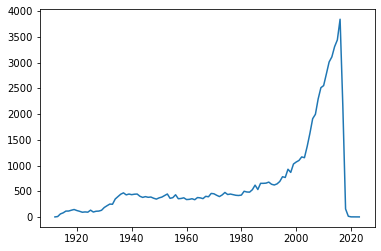

In [254]:
p.sort_index(inplace = True)
p.plot()
plt.show()

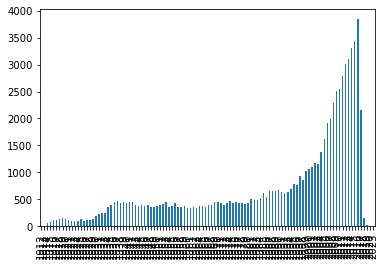

In [255]:
p.plot(kind='bar')
plt.show()

### 그룹화

In [256]:
casts.groupby(['year'])

In [257]:
casts.groupby(['year']).size()

year
1912       3
1913      10
1914      61
1915      82
1916     116
        ... 
2017    2159
2018     158
2019      16
2020       4
2023       3
Length: 110, dtype: int64

In [258]:
casts.groupby(['year']).n.max()

year
1912     16.814359
1913     16.814359
1914     39.000000
1915     16.814359
1916     35.000000
           ...    
2017    620.000000
2018     21.000000
2019     16.814359
2020     16.814359
2023     16.814359
Name: n, Length: 110, dtype: float64

In [259]:
casts.groupby(['year']).n.min()

year
1912     6.000000
1913     1.000000
1914     1.000000
1915     1.000000
1916     1.000000
          ...    
2017     1.000000
2018     2.000000
2019     6.000000
2020    16.814359
2023    16.814359
Name: n, Length: 110, dtype: float64

In [260]:
# casts중 Aaron Abrams가 출연한 영화를 모두 선택해 cf변수에 저장

In [261]:
cf = casts[casts['name'] == 'Aaron Abrams']

In [262]:
cf

,title,year,name,type,character,n
5765,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,16.814359
5766,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.000000
5767,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.000000
5768,At Home by Myself... with You,2009,Aaron Abrams,actor,Guy,2.000000
5769,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.000000
5770,Closet Monster,2015,Aaron Abrams,actor,Peter Madly,1.000000
5771,Code 8,2018,Aaron Abrams,actor,Actor,16.814359
5772,Firehouse Dog,2007,Aaron Abrams,actor,Policeman at Bridge,32.000000
5773,Flash of Genius,2008,Aaron Abrams,actor,Ian Meillor,44.000000
5774,It Was You Charlie,2013,Aaron Abrams,actor,Tom,3.000000


In [263]:
# Aaron Abrams가 각 연도별 출연한 영화의 수를 구하고 막대 그래프로 그리기

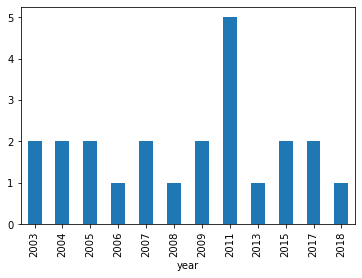

In [264]:
cf.groupby(['year']).size().plot(kind='bar')
plt.show()

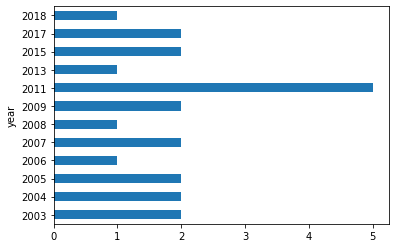

In [265]:
cf.groupby(['year']).size().plot(kind='barh')
plt.show()

In [266]:
# casts에서 decade마다(10년마다) 몇 편의 영화가 나왔는지 구하시오

In [271]:
decade = casts['year']//10 * 10

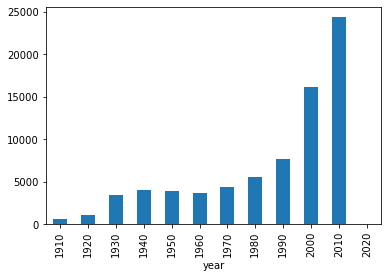

In [272]:
casts.groupby(decade).size().plot(kind='bar')
plt.show()

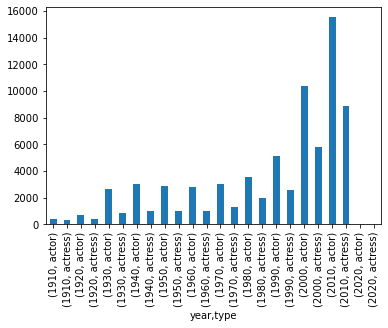

In [273]:
casts.groupby([decade,'type']).size().plot(kind='bar')
plt.show()

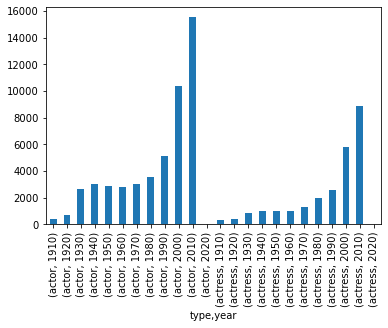

In [276]:
c_dec3 = casts.groupby(['type',decade]).size()
c_dec3.plot(kind='bar')
plt.show()

In [277]:
c_dec3.unstack() #multiindex --> colum으로 변경

year,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
type,,,,,,,,,,,,
actor,384,710,2628,3014,2877,2775,3044,3565,5108,10368,15523,4
actress,285,411,820,983,1015,968,1299,1989,2544,5831,8853,3


In [278]:
c_dec3.unstack(level=0)

type,actor,actress
year,,
1910,384,285
1920,710,411
1930,2628,820
1940,3014,983
1950,2877,1015
1960,2775,968
1970,3044,1299
1980,3565,1989
1990,5108,2544


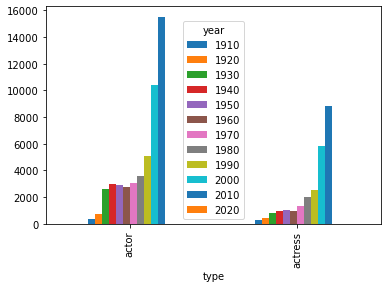

In [279]:
c_dec3.unstack().plot(kind='bar')
plt.show()

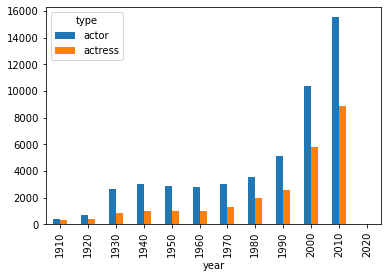

In [280]:
c_dec3.unstack(level=0).plot(kind='bar')
plt.show()

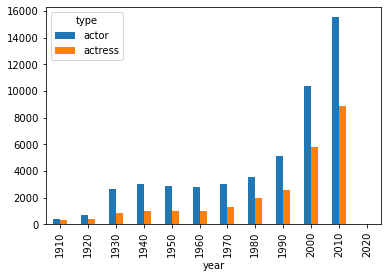

In [281]:
c_dec3.unstack().T.plot(kind='bar')
plt.show()

In [282]:
release=pd.read_csv('release_dates.csv')

In [283]:
release.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    50000 non-null  object
 1   year     50000 non-null  int64 
 2   country  50000 non-null  object
 3   date     50000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [284]:
release.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


In [285]:
casts[casts['title']=='Amelia']

,title,year,name,type,character,n
5767,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0
23319,Amelia,2009,Jeremy Akerman,actor,Sheriff,19.0


In [286]:
release[release['title']=='Amelia']

,title,year,country,date
20543,Amelia,1966,Mexico,1966-03-10
20544,Amelia,2009,Canada,2009-10-23
20545,Amelia,2009,USA,2009-10-23
20546,Amelia,2009,Australia,2009-11-12
20547,Amelia,2009,Singapore,2009-11-12
20548,Amelia,2009,Ireland,2009-11-13
20549,Amelia,2009,Mexico,2009-11-13
20550,Amelia,2009,UK,2009-11-13
20551,Amelia,2009,Spain,2009-11-20
20552,Amelia,2009,Philippines,2009-12-02


In [287]:
c_amelia=casts[casts['title'] == 'Amelia']

In [288]:
r_amelia=release[release['title']=='Amelia']

In [289]:
c_amelia

,title,year,name,type,character,n
5767,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0
23319,Amelia,2009,Jeremy Akerman,actor,Sheriff,19.0


In [290]:
r_amelia

,title,year,country,date
20543,Amelia,1966,Mexico,1966-03-10
20544,Amelia,2009,Canada,2009-10-23
20545,Amelia,2009,USA,2009-10-23
20546,Amelia,2009,Australia,2009-11-12
20547,Amelia,2009,Singapore,2009-11-12
20548,Amelia,2009,Ireland,2009-11-13
20549,Amelia,2009,Mexico,2009-11-13
20550,Amelia,2009,UK,2009-11-13
20551,Amelia,2009,Spain,2009-11-20
20552,Amelia,2009,Philippines,2009-12-02


In [291]:
c_amelia.append(r_amelia)

,title,year,name,type,character,n,country,date
5767,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,NaN,NaN
23319,Amelia,2009,Jeremy Akerman,actor,Sheriff,19.0,NaN,NaN
20543,Amelia,1966,NaN,NaN,NaN,NaN,Mexico,1966-03-10
20544,Amelia,2009,NaN,NaN,NaN,NaN,Canada,2009-10-23
20545,Amelia,2009,NaN,NaN,NaN,NaN,USA,2009-10-23
20546,Amelia,2009,NaN,NaN,NaN,NaN,Australia,2009-11-12
20547,Amelia,2009,NaN,NaN,NaN,NaN,Singapore,2009-11-12
20548,Amelia,2009,NaN,NaN,NaN,NaN,Ireland,2009-11-13
20549,Amelia,2009,NaN,NaN,NaN,NaN,Mexico,2009-11-13
20550,Amelia,2009,NaN,NaN,NaN,NaN,UK,2009-11-13


In [292]:
c_amelia.merge(r_amelia)   #공통된 칼럼을 기준으로 병합. 1966꺼는 c_amelia에 없어서 빠짐

,title,year,name,type,character,n,country,date
0,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Canada,2009-10-23
1,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,USA,2009-10-23
2,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Australia,2009-11-12
3,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Singapore,2009-11-12
4,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Ireland,2009-11-13
5,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Mexico,2009-11-13
6,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,UK,2009-11-13
7,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Spain,2009-11-20
8,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Philippines,2009-12-02
9,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Italy,2009-12-23


In [293]:
# Aaron Abrams와 함께 출연한 배우들의 리스트

In [294]:
casts[casts['name'] == 'Aaron Abrams']

,title,year,name,type,character,n
5765,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,16.814359
5766,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.000000
5767,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.000000
5768,At Home by Myself... with You,2009,Aaron Abrams,actor,Guy,2.000000
5769,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.000000
5770,Closet Monster,2015,Aaron Abrams,actor,Peter Madly,1.000000
5771,Code 8,2018,Aaron Abrams,actor,Actor,16.814359
5772,Firehouse Dog,2007,Aaron Abrams,actor,Policeman at Bridge,32.000000
5773,Flash of Genius,2008,Aaron Abrams,actor,Ian Meillor,44.000000
5774,It Was You Charlie,2013,Aaron Abrams,actor,Tom,3.000000


In [295]:
c_aaron = casts[casts['name'] == 'Aaron Abrams']

In [300]:
c_aaron.merge(casts,on=['title', 'year'])

,title,year,name_x,type_x,character_x,n_x,name_y,type_y,character_y,n_y
0,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,16.814359,Aaron Abrams,actor,Ralph Sinclair,16.814359
1,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,16.814359,Christian Ackerman,actor,Simon,16.814359
2,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.000000,Graham Abbey,actor,Officer #2,8.000000
3,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.000000,Aaron Abrams,actor,Alex,4.000000
4,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.000000,Aaron Abrams,actor,Slim Gordon,8.000000
5,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.000000,Jeremy Akerman,actor,Sheriff,19.000000
6,At Home by Myself... with You,2009,Aaron Abrams,actor,Guy,2.000000,Aaron Abrams,actor,Guy,2.000000
7,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.000000,Aaron Abrams,actor,1928 Fan,67.000000
8,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.000000,Nick Alachiotis,actor,Baer Cornerman,38.000000
9,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.000000,Nick Alachiotis,actor,Undercard Boxer - Feldman,38.000000


In [302]:
c_costar = c_aaron.merge(casts,on=['title', 'year'])

In [304]:
c_costar[c_costar['name_x'] != c_costar['name_y']]

,title,year,name_x,type_x,character_x,n_x,name_y,type_y,character_y,n_y
1,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,16.814359,Christian Ackerman,actor,Simon,16.814359
2,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.000000,Graham Abbey,actor,Officer #2,8.000000
5,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.000000,Jeremy Akerman,actor,Sheriff,19.000000
8,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.000000,Nick Alachiotis,actor,Baer Cornerman,38.000000
9,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.000000,Nick Alachiotis,actor,Undercard Boxer - Feldman,38.000000
10,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.000000,Magdalena Alexander,actress,Angry Woman,78.000000
11,Closet Monster,2015,Aaron Abrams,actor,Peter Madly,1.000000,Buffy #1,actor,Buffy 4,31.000000
14,Code 8,2018,Aaron Abrams,actor,Actor,16.814359,Robbie Amell,actor,Actor,16.814359
15,Code 8,2018,Aaron Abrams,actor,Actor,16.814359,Stephen Amell,actor,Actor,16.814359
17,Firehouse Dog,2007,Aaron Abrams,actor,Policeman at Bridge,32.000000,Joseph Adam,actor,Ceremony Reporter #1,39.000000


In [305]:
c_costar = c_costar[c_costar['name_x'] != c_costar['name_y']]

In [306]:
c_costar[['title','year','name_y']]

,title,year,name_y
1,#FromJennifer,2017,Christian Ackerman
2,388 Arletta Avenue,2011,Graham Abbey
5,Amelia,2009,Jeremy Akerman
8,Cinderella Man,2005,Nick Alachiotis
9,Cinderella Man,2005,Nick Alachiotis
10,Cinderella Man,2005,Magdalena Alexander
11,Closet Monster,2015,Buffy #1
14,Code 8,2018,Robbie Amell
15,Code 8,2018,Stephen Amell
17,Firehouse Dog,2007,Joseph Adam


In [307]:
c_costar = c_costar[['title','year','name_y']]

In [308]:
c_costar['name_y'].duplicated()   #중복인거 true

1     False
2     False
5     False
8     False
9      True
10    False
11    False
14    False
15    False
17    False
18     True
19    False
21    False
22    False
24    False
27    False
30     True
32    False
33     True
35    False
37    False
39     True
44    False
45    False
46    False
47    False
48    False
51    False
53    False
54    False
55     True
56    False
Name: name_y, dtype: bool

In [310]:
c_costar.drop_duplicates()   #중복된 데이터 행 없앰

,title,year,name_y
1,#FromJennifer,2017,Christian Ackerman
2,388 Arletta Avenue,2011,Graham Abbey
5,Amelia,2009,Jeremy Akerman
8,Cinderella Man,2005,Nick Alachiotis
10,Cinderella Man,2005,Magdalena Alexander
11,Closet Monster,2015,Buffy #1
14,Code 8,2018,Robbie Amell
15,Code 8,2018,Stephen Amell
17,Firehouse Dog,2007,Joseph Adam
18,Firehouse Dog,2007,Magdalena Alexander


In [311]:
c_costar=c_costar.drop_duplicates()

In [312]:
c_costar

,title,year,name_y
1,#FromJennifer,2017,Christian Ackerman
2,388 Arletta Avenue,2011,Graham Abbey
5,Amelia,2009,Jeremy Akerman
8,Cinderella Man,2005,Nick Alachiotis
10,Cinderella Man,2005,Magdalena Alexander
11,Closet Monster,2015,Buffy #1
14,Code 8,2018,Robbie Amell
15,Code 8,2018,Stephen Amell
17,Firehouse Dog,2007,Joseph Adam
18,Firehouse Dog,2007,Magdalena Alexander
